# MAZ Diplomarbeit - Biodiversität in der Schweiz#

Ich möchte die Daten der Schweiz (die Hauptkategorien) gerne mit den internationalen Roten Listen abgleichen. Also habe ich mir die entsprechenden Kategorien bei der IUCN rausgesucht. Da es sich nur um sieben Stück handelt schnell per"copy-paste" und via Sheets in ein csv. Ansonsten ist das Vorgehen den anderen Notebooks sehr ähnlich.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("01_source/csv/IUCN_overview.csv")

In [4]:
df.head(10)

,cat,est number of described species,numb of species evaluated by 2018,numb of threatened species in 2018,"sp ev in 2018, as % of species described",non threat,not evaluated
0,mammals,5692,5692,1219,100.0,4473,0
1,birds,11126,11126,1492,100.0,9634,0
2,reptiles,10793,7127,1307,66.0,5820,3666
3,amphibians,7926,6722,2092,85.0,4630,1204
4,fishes,34000,16803,2332,49.0,14471,17197
5,molluscs,85000,8627,2195,10.0,6432,76373
6,insects,1000000,8037,1537,0.8,6500,991963
7,plants and fungi,362722,27595,13358,7.6,14237,335127


Ich lasse Python die gefährdeten (und nicht gefährdeten) Arten für mich zusammenrechnen...

In [5]:
redlist = sum (df["numb of threatened species in 2018"])
redlist

25532

In [6]:
notthreatened =  sum (df["non threat"])
notthreatened

66197

Ebenso alle Arten, die (noch) nicht ausgewertet wurden.

In [7]:
nodata = sum (df["not evaluated"])
nodata

1425530

Dies ergibt denselben Pie Chart wie mit den anderen Daten...

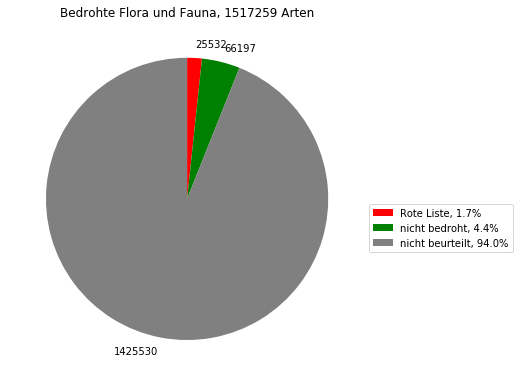

In [8]:
values = [25532, 66197, 1425530]
colors = ['r', 'g', 'grey']
labels = [
    'Rote Liste', 'nicht bedroht',
    'nicht beurteilt']


fig1, ax1 = plt.subplots(figsize=(7, 6))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('Bedrohte Flora und Fauna, 1517259 Arten')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()

... und den Chart ohne die "nicht-beurteilt-Kategorie"...

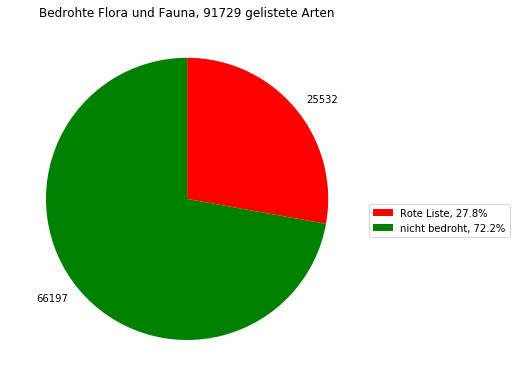

In [9]:
values = [25532, 66197]
colors = ['r', 'g']
labels = [
    'Rote Liste', 'nicht bedroht']


fig1, ax1 = plt.subplots(figsize=(7, 6))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('Bedrohte Flora und Fauna, 91729 gelistete Arten')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()

In [10]:
df.head(7)

,cat,est number of described species,numb of species evaluated by 2018,numb of threatened species in 2018,"sp ev in 2018, as % of species described",non threat,not evaluated
0,mammals,5692,5692,1219,100.0,4473,0
1,birds,11126,11126,1492,100.0,9634,0
2,reptiles,10793,7127,1307,66.0,5820,3666
3,amphibians,7926,6722,2092,85.0,4630,1204
4,fishes,34000,16803,2332,49.0,14471,17197
5,molluscs,85000,8627,2195,10.0,6432,76373
6,insects,1000000,8037,1537,0.8,6500,991963


In [11]:
df.pop("sp ev in 2018, as % of species described")
df.pop("est number of described species")
df.pop("numb of species evaluated by 2018")

df.head()

,cat,numb of threatened species in 2018,non threat,not evaluated
0,mammals,1219,4473,0
1,birds,1492,9634,0
2,reptiles,1307,5820,3666
3,amphibians,2092,4630,1204
4,fishes,2332,14471,17197


In [12]:
df.apply(lambda x: x.tolist(), axis=1)

0                    [mammals, 1219, 4473, 0]
1                      [birds, 1492, 9634, 0]
2                [reptiles, 1307, 5820, 3666]
3              [amphibians, 2092, 4630, 1204]
4                [fishes, 2332, 14471, 17197]
5               [molluscs, 2195, 6432, 76373]
6               [insects, 1537, 6500, 991963]
7    [plants and fungi, 13358, 14237, 335127]
dtype: object

... und natürlich die entsprechenden Unterkategorien...

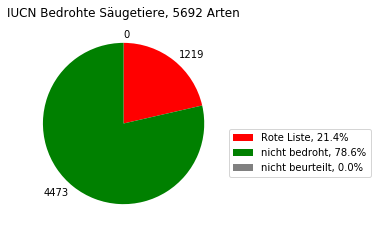

In [13]:
values = [1219, 4473, 0]
colors = ['r', 'g', 'grey']
labels = ['Rote Liste', 'nicht bedroht', 'nicht beurteilt']

fig1, ax1 = plt.subplots(figsize=(4, 3))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('IUCN Bedrohte Säugetiere, 5692 Arten')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()

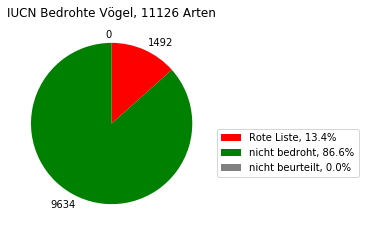

In [14]:
values = [1492, 9634, 0]
colors = ['r', 'g', 'grey']
labels = ['Rote Liste', 'nicht bedroht', 'nicht beurteilt']

fig1, ax1 = plt.subplots(figsize=(4, 3))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('IUCN Bedrohte Vögel, 11126 Arten')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()

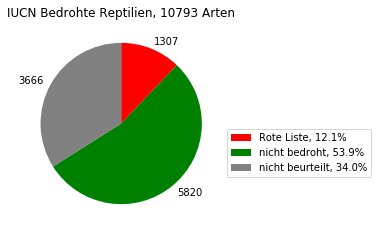

In [15]:
values = [1307, 5820, 3666]
colors = ['r', 'g', 'grey']
labels = ['Rote Liste', 'nicht bedroht', 'nicht beurteilt']

fig1, ax1 = plt.subplots(figsize=(4, 3))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('IUCN Bedrohte Reptilien, 10793 Arten')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()

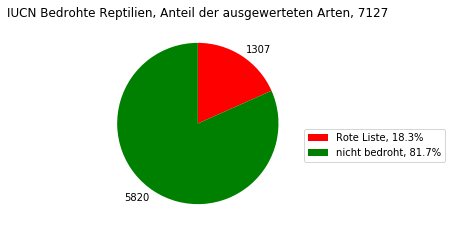

In [16]:
values = [1307, 5820]
colors = ['r', 'g']
labels = ['Rote Liste', 'nicht bedroht', 'nicht beurteilt']


fig1, ax1 = plt.subplots(figsize=(4, 3))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('IUCN Bedrohte Reptilien, Anteil der ausgewerteten Arten, 7127')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()

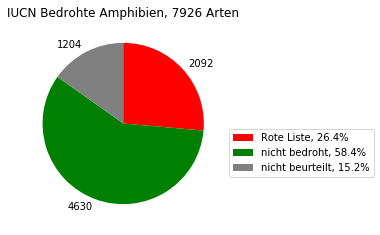

In [17]:
values = [2092, 4630, 1204]
colors = ['r', 'g', 'grey']
labels = ['Rote Liste', 'nicht bedroht','nicht beurteilt']

fig1, ax1 = plt.subplots(figsize=(4, 3))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('IUCN Bedrohte Amphibien, 7926 Arten')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()

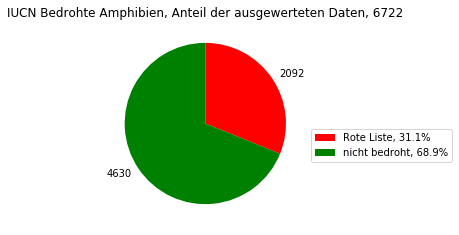

In [18]:
values = [2092, 4630]
colors = ['r', 'g']
labels = ['Rote Liste', 'nicht bedroht']

fig1, ax1 = plt.subplots(figsize=(4, 3))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('IUCN Bedrohte Amphibien, Anteil der ausgewerteten Daten, 6722')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()

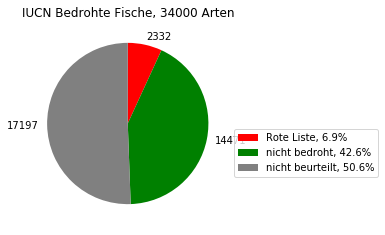

In [19]:
values = [2332, 14471, 17197]
colors = ['r', 'g', 'grey']
labels = ['Rote Liste', 'nicht bedroht', 'nicht beurteilt']

fig1, ax1 = plt.subplots(figsize=(4, 3))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('IUCN Bedrohte Fische, 34000 Arten')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()

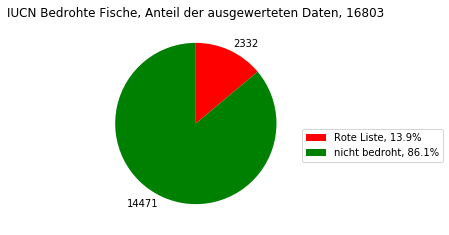

In [20]:
values = [2332, 14471]
colors = ['r', 'g']
labels = ['Rote Liste', 'nicht bedroht']

fig1, ax1 = plt.subplots(figsize=(4, 3))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('IUCN Bedrohte Fische, Anteil der ausgewerteten Daten, 16803')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()

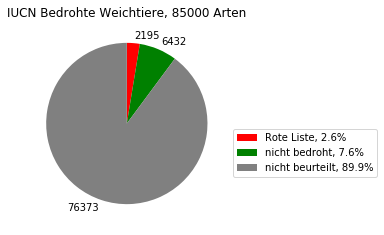

In [21]:
values = [2195, 6432, 76373]
colors = ['r', 'g', 'grey']
labels = ['Rote Liste', 'nicht bedroht','nicht beurteilt']

fig1, ax1 = plt.subplots(figsize=(4, 3))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('IUCN Bedrohte Weichtiere, 85000 Arten')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()

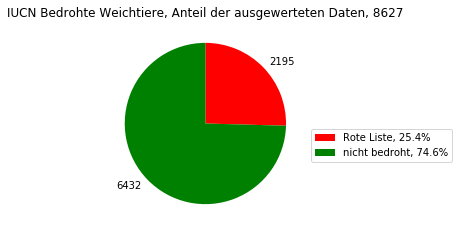

In [22]:
values = [2195, 6432]
colors = ['r', 'g']
labels = ['Rote Liste', 'nicht bedroht']

fig1, ax1 = plt.subplots(figsize=(4, 3))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('IUCN Bedrohte Weichtiere, Anteil der ausgewerteten Daten, 8627')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()

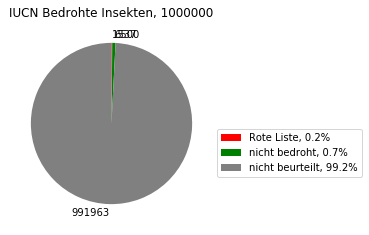

In [23]:
values = [1537, 6500, 991963]
colors = ['r', 'g', 'grey']
labels = ['Rote Liste', 'nicht bedroht','nicht beurteilt']

fig1, ax1 = plt.subplots(figsize=(4, 3))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('IUCN Bedrohte Insekten, 1000000')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()

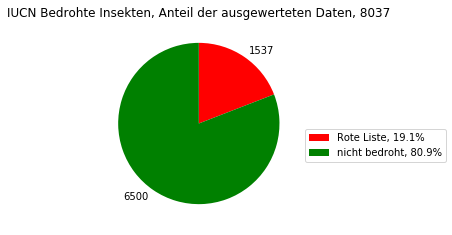

In [24]:
values = [1537, 6500]
colors = ['r', 'g']
labels = ['Rote Liste', 'nicht bedroht']

fig1, ax1 = plt.subplots(figsize=(4, 3))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('IUCN Bedrohte Insekten, Anteil der ausgewerteten Daten, 8037')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()

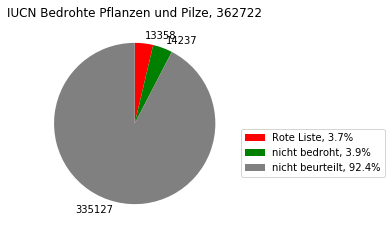

In [25]:
values = [13358, 14237, 335127]
colors = ['r', 'g', 'grey']
labels = ['Rote Liste', 'nicht bedroht', 'nicht beurteilt']

fig1, ax1 = plt.subplots(figsize=(4, 3))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('IUCN Bedrohte Pflanzen und Pilze, 362722')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()

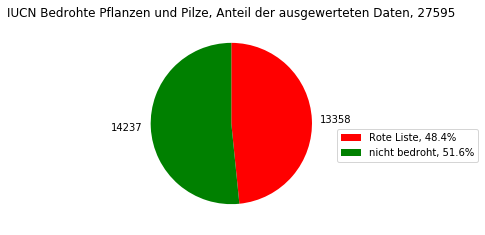

In [26]:
values = [13358, 14237]
colors = ['r', 'g']
labels = ['Rote Liste', 'nicht bedroht']

fig1, ax1 = plt.subplots(figsize=(4, 3))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('IUCN Bedrohte Pflanzen und Pilze, Anteil der ausgewerteten Daten, 27595')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()

In [45]:
df2 = df[df.cat != 'plants and fungi']

df2.head(10)

,cat,numb of threatened species in 2018,non threat,not evaluated
0,mammals,1219,4473,0
1,birds,1492,9634,0
2,reptiles,1307,5820,3666
3,amphibians,2092,4630,1204
4,fishes,2332,14471,17197
5,molluscs,2195,6432,76373
6,insects,1537,6500,991963


In [46]:
redlist = sum (df2["numb of threatened species in 2018"])
redlist

12174

In [47]:
non = sum (df2["non threat"])
non

51960

In [50]:
nodata = sum (df2["not evaluated"])
nodata

1090403

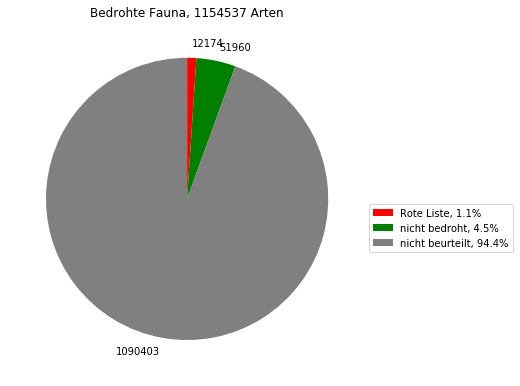

In [55]:
values = [12174, 51960, 1090403]
colors = ['r', 'g', 'grey']
labels = [
    'Rote Liste', 'nicht bedroht',
    'nicht beurteilt']


fig1, ax1 = plt.subplots(figsize=(7, 6))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('Bedrohte Fauna, 1154537 Arten')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()

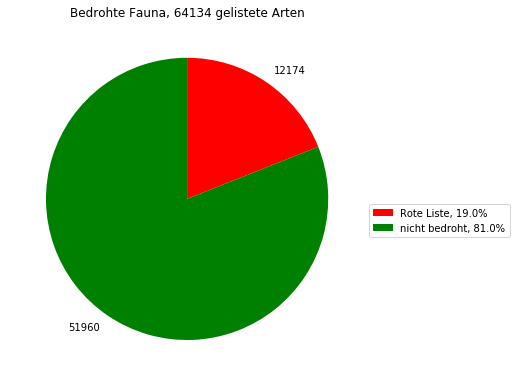

In [54]:
values = [12174, 51960]
colors = ['r', 'g']
labels = [
    'Rote Liste', 'nicht bedroht']


fig1, ax1 = plt.subplots(figsize=(7, 6))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('Bedrohte Fauna, 64134 gelistete Arten')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()